In [1]:
cd C:\Users\juanc\Downloads\Electivo I\Recursos\Recursos\Datos\WRF

C:\Users\juanc\Downloads\Electivo I\Recursos\Recursos\Datos\WRF


Variable: T2
RMSE: 2.115920084651041
BIAS: 0.24478819183515765


Variable: td2
RMSE: 4.335859169650661
BIAS: 2.0852211663220204


Variable: ws10
RMSE: 2.4649578531822227
BIAS: 1.1725834909894897




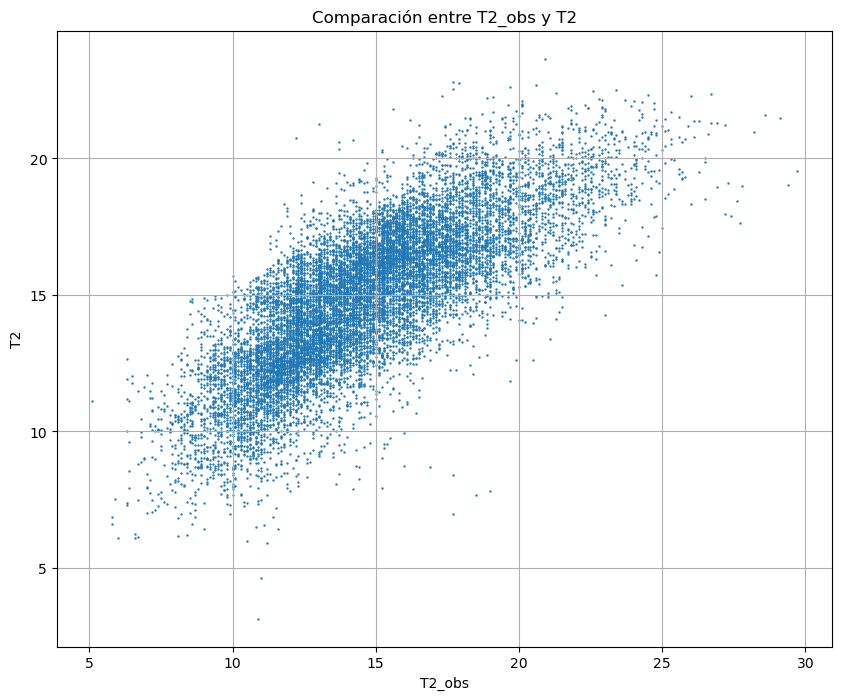

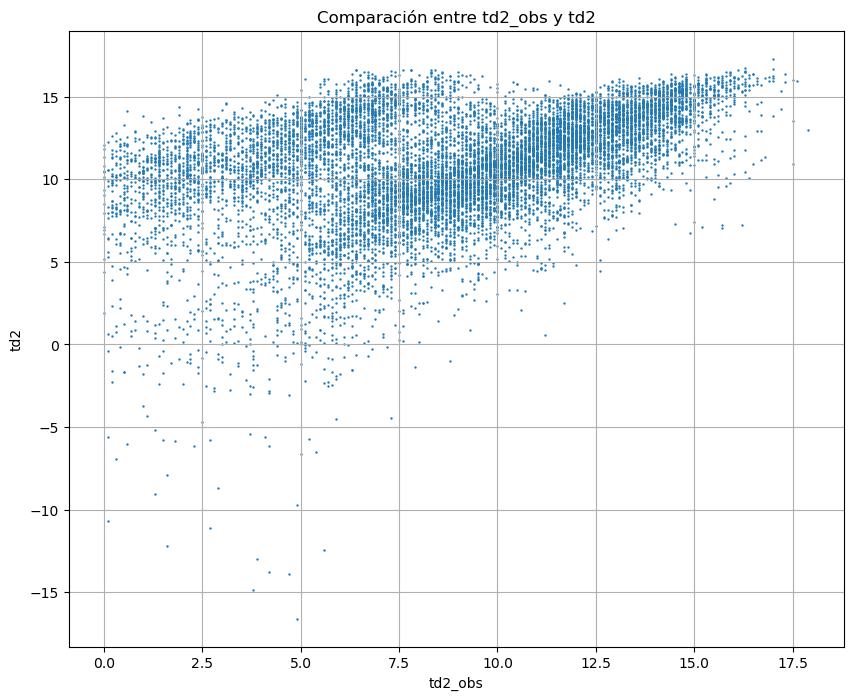

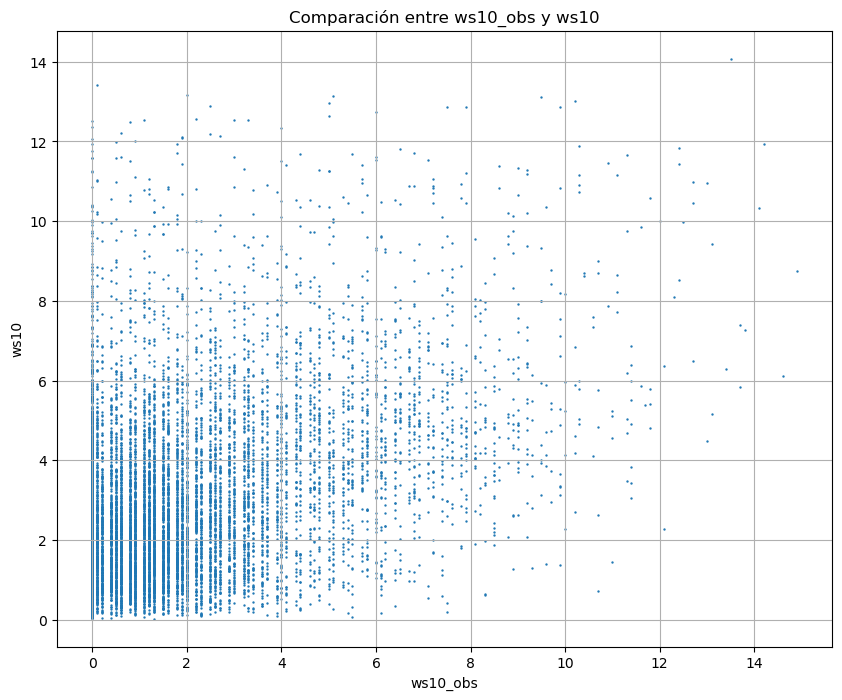

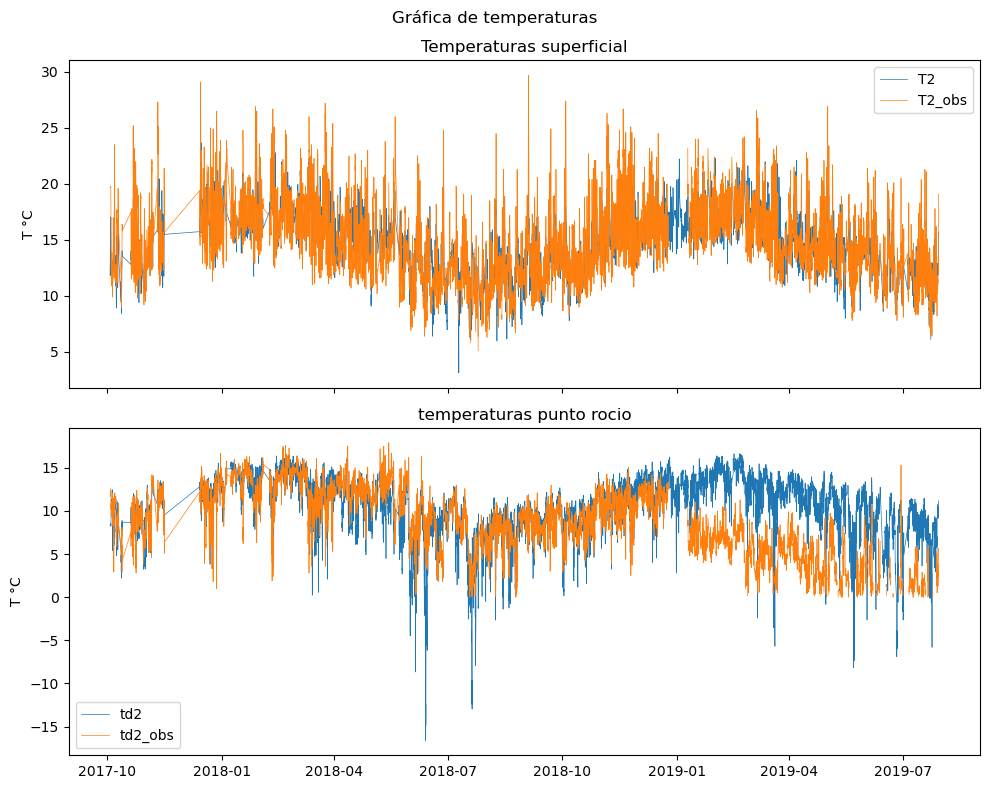

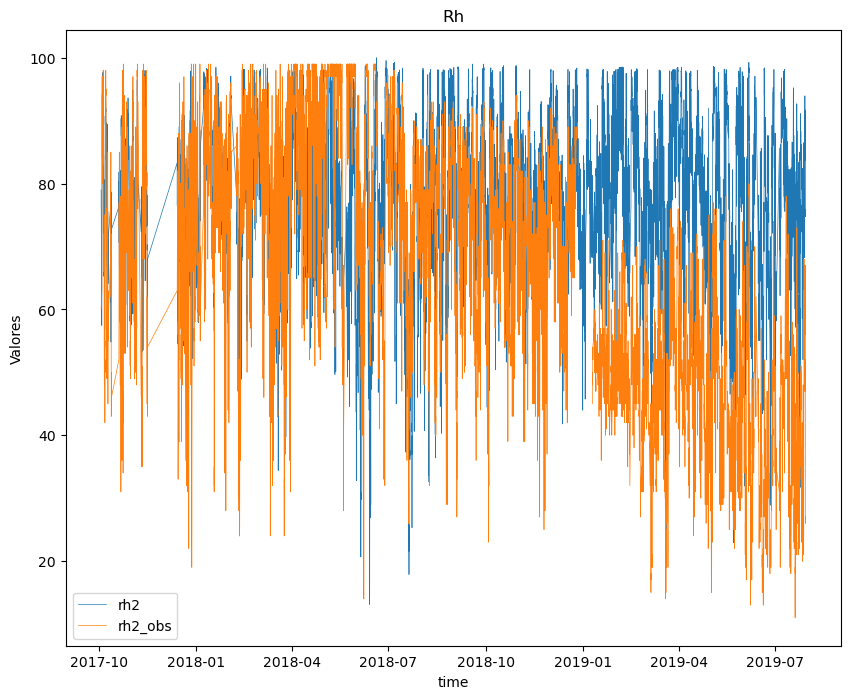

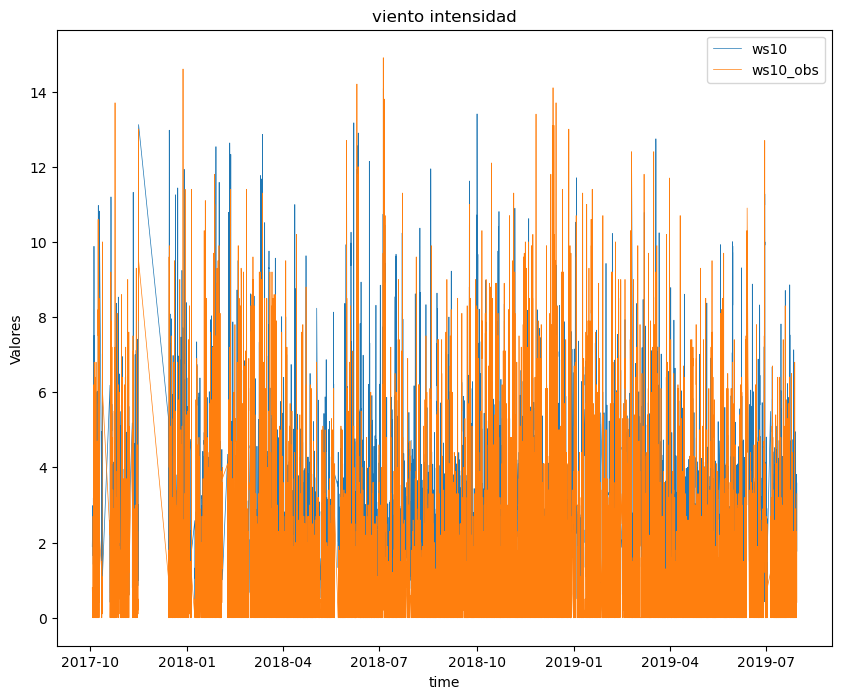

'\nRESULTADOS:\nresultados para pronostico a 1 dia:\nVariable: T2\nRMSE: 2.115920084651041\nBIAS: 0.24478819183515765\n\nVariable: td2\nRMSE: 4.335859169650661\nBIAS: 2.0852211663220204\n\nVariable: ws10\nRMSE: 2.4649578531822227\nBIAS: 1.1725834909894897\n\nresultados para pronostico a 2 dia:\nVariable: T2\nRMSE: 2.33923039245908\nBIAS: -0.16134348003372415\n\n\nVariable: td2\nRMSE: 4.23652149497066\nBIAS: 1.8582951470161226\n\n\nVariable: ws10\nRMSE: 2.488780689013316\nBIAS: 1.1205552310532503\n\nresultados para pronostico a 2 dia:\n\nVariable: T2\nRMSE: 2.4499314906498837\nBIAS: -0.24923904566654329\n\n\nVariable: td2\nRMSE: 4.230061613928053\nBIAS: 1.7572324721034893\n\n\nVariable: ws10\nRMSE: 2.517340999493644\nBIAS: 1.1216547458865918\n'

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit

#STAT function

def rmse(m,o):
        rmse= (np.nanmean((m-o) ** 2)) ** 0.5
        return rmse #(round(rm,2))

def bias(m,o):
        bias= (np.nanmean(m-o))
        return bias #(round(bias,2))


# Cargar los datos de los archivos PKL en DataFrames
path0 = 'meteo-2017-21019_por-hora_formato.csv'
path1 = 'Weather_pronostico_1dia.pkl'
path2 = 'Weather_pronostico_2dia.pkl'
path3 = 'Weather_pronostico_3dia.pkl'

df_obs = pd.read_csv(path0)
df_wrf = pd.read_pickle(path1)


### correcciones de formato para los indices de cada dataframe
df_obs.index =df_obs['Unnamed: 0']
df_obs.index = pd.to_datetime(df_obs.index)

#correccion unidad T2, de kelvin a celcius
df_wrf['T2']=df_wrf['T2']-273.16

# reagrupamos para las columnas de interes en un mismo orden.
columnas_interes = ['td', 'rh_out', 't_out','wind', 'wind_dir']
df_obs =df_obs[columnas_interes]

# Renombrar las columnas
nuevos_nombres = {'td': 'td2_obs', 'rh_out': 'rh2_obs', 't_out': 'T2_obs','wind':'ws10_obs', 'wind_dir': 'wd10_obs'}
df_obs.rename(columns=nuevos_nombres, inplace=True)
df_obs = df_obs.rename_axis('time')


# Realizar un inner join en los índices para que ambos DataFrames tengan las mismas fechas, CREANDO UN DAFRAME COMUN
df_common = df_obs.join(df_wrf, how='inner')
#### ANALISIS COMPARATIVO

# Definir arreglos para los valores de RMSE y BIAS
rmse_values = []
bias_values = []


# Calcular RMSE y BIAS para variables entre df_wrf y df_obs
variables = ['T2', 'td2', 'ws10']#,'wd10']  


for var in variables:
    df_common_var = df_common[[var, var + '_obs']]  # Crea un df comun para comparar
    #df_common_var.dropna(inplace=True)  # Eliminar filas con NaN
    
    rmse_value = rmse(df_common_var[var], df_common_var[var + '_obs'])
    bias_value = bias(df_common_var[var], df_common_var[var + '_obs'])
    
    print(f"Variable: {var}")
    print("RMSE:", rmse_value)
    print("BIAS:", bias_value)
    print("\n")

# Agregar los valores de RMSE y BIAS a los arreglos
    rmse_values.append(rmse_value)
    bias_values.append(bias_value)

## grafica de dispersion para cada variable
for var in variables:
    df_common_var = df_common[[var, var + '_obs']]  # Seleccionar las columnas relevantes

    plt.figure(figsize=(10, 8))
    plt.scatter(df_common_var[var + '_obs'], df_common_var[var], s=0.5)
    plt.xlabel(f'{var}_obs')
    plt.ylabel(var)
    plt.title(f'Comparación entre {var}_obs y {var}')
    plt.grid(True)
    plt.show()

### Grafica de paneles

##panel temperaturas

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10, 8))  # Comparte el eje x
fig.suptitle('Gráfica de temperaturas')

ax1.plot(df_common['T2'], label='T2',linewidth=0.5)
ax1.plot(df_common['T2_obs'], label='T2_obs',linewidth=0.5)
ax1.set_ylabel('T °C')

ax2.plot(df_common['td2'], label='td2',linewidth=0.5)
ax2.plot(df_common['td2_obs'], label='td2_obs',linewidth=0.5)
ax2.set_ylabel('T °C')

ax1.legend()  
ax2.legend()  

ax1.set_title('Temperaturas superficial')
ax2.set_title('temperaturas punto rocio')

plt.tight_layout()  # Ajustar automáticamente el diseño para evitar superposiciones
plt.show()

## panel rh 

fig, ax = plt.subplots( figsize=(10, 8))
#fig.suptitle('Rh')
  
ax.plot(df_common['rh2'], label='rh2',linewidth=0.5)
ax.plot(df_common['rh2_obs'], label='rh2_obs',linewidth=0.5)

ax.set_title('Rh')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('Valores')


    # Mostrar la gráfica
plt.show()
## panel viento velocidad 

fig, ax = plt.subplots( figsize=(10, 8))
#fig.suptitle('Viento: intensidad')
  
ax.plot(df_common['ws10'], label='ws10',linewidth=0.5)
ax.plot(df_common['ws10_obs'], label='ws10_obs',linewidth=0.5)

ax.set_title('viento intensidad')
ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('Valores')


    # Mostrar la gráfica
plt.show()

'''
RESULTADOS:
resultados para pronostico a 1 dia:
Variable: T2
RMSE: 2.115920084651041
BIAS: 0.24478819183515765

Variable: td2
RMSE: 4.335859169650661
BIAS: 2.0852211663220204

Variable: ws10
RMSE: 2.4649578531822227
BIAS: 1.1725834909894897

resultados para pronostico a 2 dia:
Variable: T2
RMSE: 2.33923039245908
BIAS: -0.16134348003372415


Variable: td2
RMSE: 4.23652149497066
BIAS: 1.8582951470161226


Variable: ws10
RMSE: 2.488780689013316
BIAS: 1.1205552310532503

resultados para pronostico a 2 dia:

Variable: T2
RMSE: 2.4499314906498837
BIAS: -0.24923904566654329


Variable: td2
RMSE: 4.230061613928053
BIAS: 1.7572324721034893


Variable: ws10
RMSE: 2.517340999493644
BIAS: 1.1216547458865918
'''

In [7]:
df_common

,td2_obs,rh2_obs,T2_obs,ws10_obs,wd10_obs,td2,rh2,T2,ws10,wd10
2017-10-03 06:00:00,11.7,60.0,19.7,0.8,59.0,8.251601,78.982491,11.850525,1.895875,128.436523
2017-10-03 20:00:00,12.6,63.0,19.8,0.0,345.0,8.539719,57.455528,17.045105,2.985827,229.232468
2017-10-03 21:00:00,11.4,63.0,18.6,1.1,93.0,8.413315,59.577492,16.343140,2.890961,224.737488
2017-10-03 22:00:00,11.7,63.0,18.9,0.0,355.0,8.255362,61.181828,15.761383,2.271791,210.562881
2017-10-03 23:00:00,11.3,78.0,15.1,2.7,98.0,8.528426,66.995186,14.647705,2.281139,200.388092
...,...,...,...,...,...,...,...,...,...,...
2019-07-29 13:00:00,2.6,52.0,12.1,1.3,181.0,9.579199,82.469208,12.567871,3.289512,122.461983
2019-07-29 15:00:00,3.0,42.0,15.9,2.3,280.0,10.837138,82.985580,13.769073,3.086210,271.731445
2019-07-29 16:00:00,1.3,38.0,15.5,2.2,121.0,11.075424,80.720695,14.439362,3.577457,261.133545
2019-07-29 18:00:00,NaN,26.0,19.1,0.4,303.0,11.106915,74.732483,15.662262,1.762693,181.319565


In [21]:
df=df_common.round(2)
df

,td2_obs,rh2_obs,T2_obs,ws10_obs,wd10_obs,td2,rh2,T2,ws10,wd10
2017-10-03 06:00:00,11.7,60.0,19.7,0.8,59.0,8.25,78.980003,11.850000,1.90,128.440002
2017-10-03 20:00:00,12.6,63.0,19.8,0.0,345.0,8.54,57.459999,17.049999,2.99,229.229996
2017-10-03 21:00:00,11.4,63.0,18.6,1.1,93.0,8.41,59.580002,16.340000,2.89,224.740005
2017-10-03 22:00:00,11.7,63.0,18.9,0.0,355.0,8.26,61.180000,15.760000,2.27,210.559998
2017-10-03 23:00:00,11.3,78.0,15.1,2.7,98.0,8.53,67.000000,14.650000,2.28,200.389999
...,...,...,...,...,...,...,...,...,...,...
2019-07-29 13:00:00,2.6,52.0,12.1,1.3,181.0,9.58,82.470001,12.570000,3.29,122.459999
2019-07-29 15:00:00,3.0,42.0,15.9,2.3,280.0,10.84,82.989998,13.770000,3.09,271.730011
2019-07-29 16:00:00,1.3,38.0,15.5,2.2,121.0,11.08,80.720001,14.440000,3.58,261.130005
2019-07-29 18:00:00,NaN,26.0,19.1,0.4,303.0,11.11,74.730003,15.660000,1.76,181.320007


In [51]:
df_common

,td2_obs,rh2_obs,T2_obs,ws10_obs,wd10_obs,td2,rh2,T2,ws10,wd10
2017-10-03 06:00:00,11.7,60.0,19.7,0.8,59.0,8.251601,78.982491,11.850525,1.895875,128.436523
2017-10-03 20:00:00,12.6,63.0,19.8,0.0,345.0,8.539719,57.455528,17.045105,2.985827,229.232468
2017-10-03 21:00:00,11.4,63.0,18.6,1.1,93.0,8.413315,59.577492,16.343140,2.890961,224.737488
2017-10-03 22:00:00,11.7,63.0,18.9,0.0,355.0,8.255362,61.181828,15.761383,2.271791,210.562881
2017-10-03 23:00:00,11.3,78.0,15.1,2.7,98.0,8.528426,66.995186,14.647705,2.281139,200.388092
...,...,...,...,...,...,...,...,...,...,...
2019-07-29 13:00:00,2.6,52.0,12.1,1.3,181.0,9.579199,82.469208,12.567871,3.289512,122.461983
2019-07-29 15:00:00,3.0,42.0,15.9,2.3,280.0,10.837138,82.985580,13.769073,3.086210,271.731445
2019-07-29 16:00:00,1.3,38.0,15.5,2.2,121.0,11.075424,80.720695,14.439362,3.577457,261.133545
2019-07-29 18:00:00,NaN,26.0,19.1,0.4,303.0,11.106915,74.732483,15.662262,1.762693,181.319565


In [ ]:
'''
#Código de referencia para gráficos a color
from scipy.stats import gaussian_kde

idx1=~np.isnan(seeing_scidar1) & ~np.isnan(seeing_sim1)
w1=np.vstack([seeing_scidar1[idx1],seeing_sim1[idx1]])
z1 = gaussian_kde(w1)(w1)

pl.scatter(seeing_scidar1[idx1],seeing_sim1[idx1],c=z1,s=1)
'''

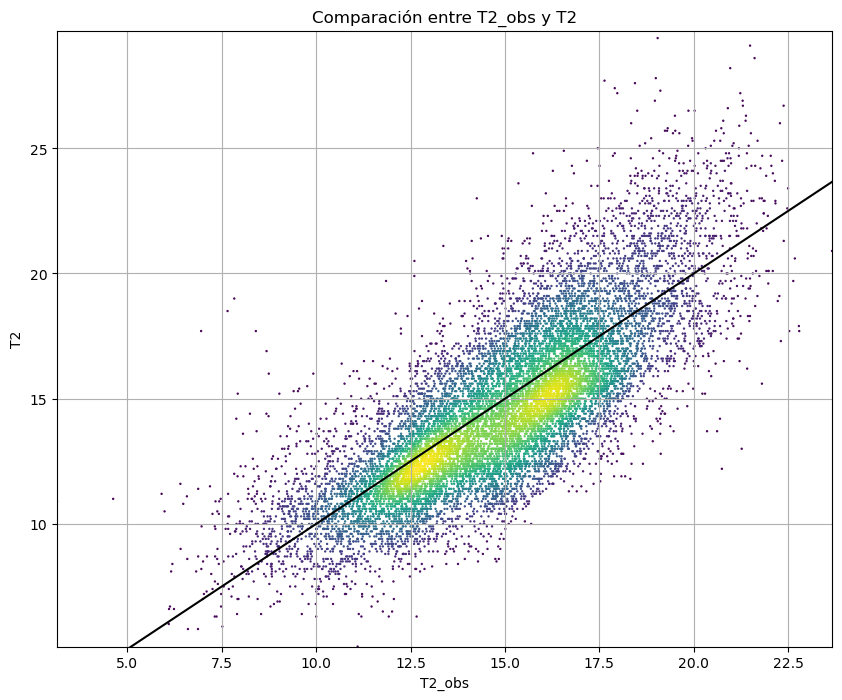

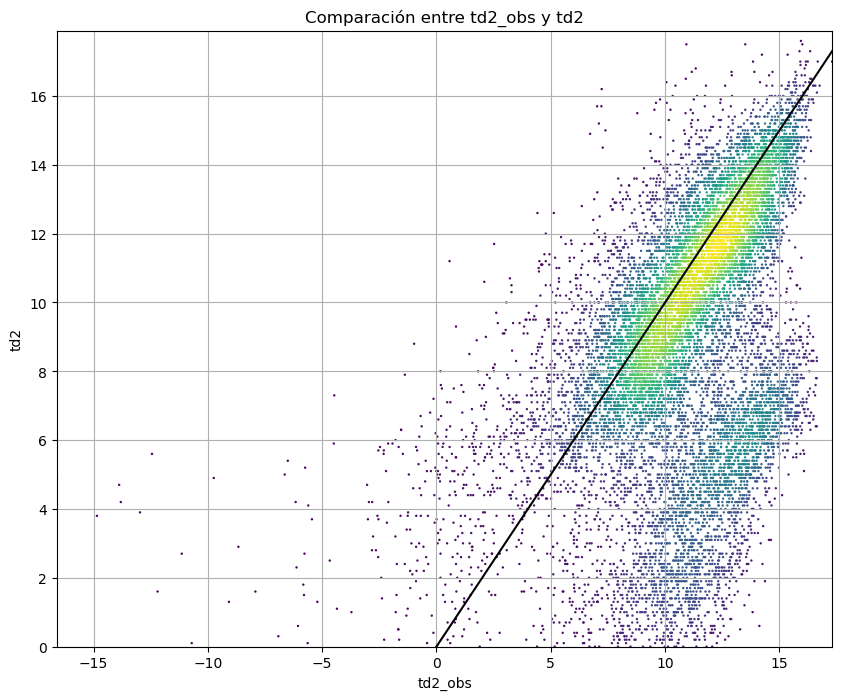

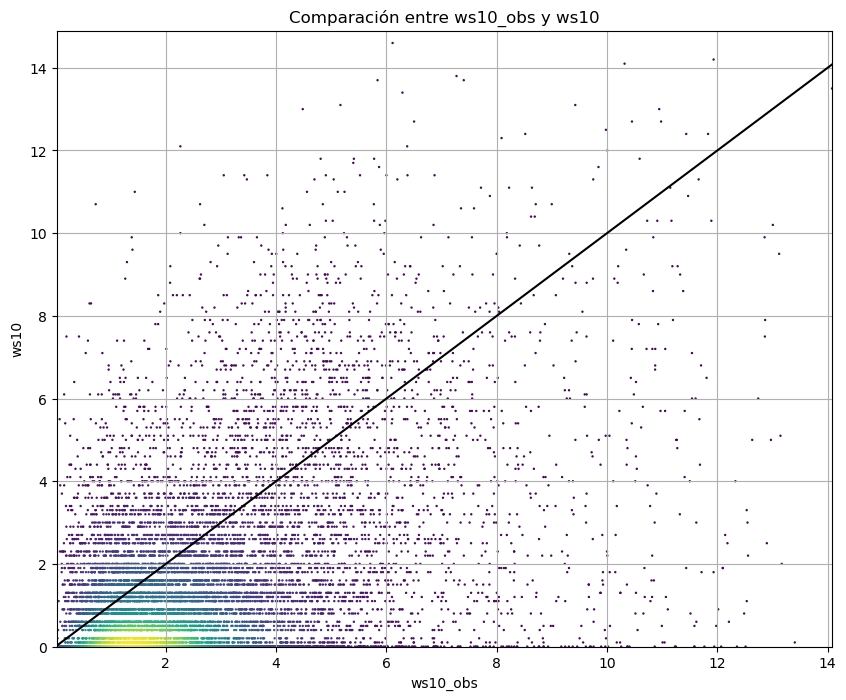

In [63]:
#Comparación de gráficos a color
from scipy.stats import gaussian_kde
import matplotlib.pyplot as pl

for var in variables:
    plt.figure(figsize=(10, 8))
    df = df_common[[var, var + '_obs']].dropna()
    #df=df.round(2)
    values = df[[var, var + '_obs']].values.T
    # densidad de probabilidad
    densidad = gaussian_kde(values)(values)
    pl.plot([-30,30], [-30,30],color='black')
    pl.scatter(df[var], df[var + '_obs'], c=densidad, s=0.5)
    plt.xlabel(f'{var}_obs')
    plt.ylabel(var)
    plt.title(f'Comparación entre {var}_obs y {var}')
    x_min, x_max = df[var].min(), df[var].max()
    y_min, y_max = df[var + '_obs'].min(), df[var + '_obs'].max()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    pl.grid(True)
    pl.show()

In [ ]:
'''
# Calcular RMSE y BIAS para la columna 'T2' (temperatura) entre df_wrf y df_obs
rmse_t2 = rmse(df_common['T2'] - 273.16, df_common['T2_obs'])
bias_t2 = bias(df_common['T2'] - 273.16, df_common['T2_obs'])


# Calcular RMSE y BIAS para la columna 'td' (temperatura punto rocio) entre df_wrf y df_obs
rmse_td = rmse(df_common['td2'], df_common['td2_obs'])
bias_td = bias(df_common['td2'], df_common['td2_obs'])

# Calcular RMSE y BIAS para la columna 'ws' (direccion del viento) entre df_wrf y df_obs
rmse_wd = rmse(df_common['ws10'], df_common['ws10_obs'])
bias_wd = bias(df_common['ws10'], df_common['ws10_obs'])

#df_common.to_pickle('data_wrf-obs.pkl')
'''